## Importing

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import sklearn
import keras
from keras.models import Sequential
from keras.layers import *

from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize


## Loading the file and changing index

Dropping the index and adding timestamp as index

In [2]:
address = '/Users/aravind/OneDrive/OneDocuments/Data/EnergyInnovations/Bio.csv'


k=pd.date_range('2019-01-01', periods=8760, freq='H')
l = k.to_frame(name='timestamp')
m = l.reset_index(drop='True')
data = pd.read_csv(address)
data['timestamp'] = m
#T = np.array(data['TAVG']).reshape(-1,1)
#data['TAVG'] = np.nan_to_num(data['TAVG'])
#data['normalizedT']= normalize(T)
#T = np.where(np.isnan(T))
#print(T)
final = data.set_index('timestamp')
final

,kW,Day,DayDummy,Month,Date,Hour,semesterBool,TAVG,TMAX,TMIN
timestamp,,,,,,,,,,
2019-01-01 00:00:00,453.496758,Weekday,1,Jan,1,0,1,43,51,38
2019-01-01 01:00:00,451.553001,Weekday,1,Jan,1,1,1,43,51,38
2019-01-01 02:00:00,444.206505,Weekday,1,Jan,1,2,1,43,51,38
2019-01-01 03:00:00,442.267487,Weekday,1,Jan,1,3,1,43,51,38
2019-01-01 04:00:00,454.330498,Weekday,1,Jan,1,4,1,43,51,38
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,471.445747,Weekday,1,Dec,31,19,1,54,59,45
2019-12-31 20:00:00,459.382500,Weekday,1,Dec,31,20,1,54,59,45
2019-12-31 21:00:00,456.173996,Weekday,1,Dec,31,21,1,54,59,45


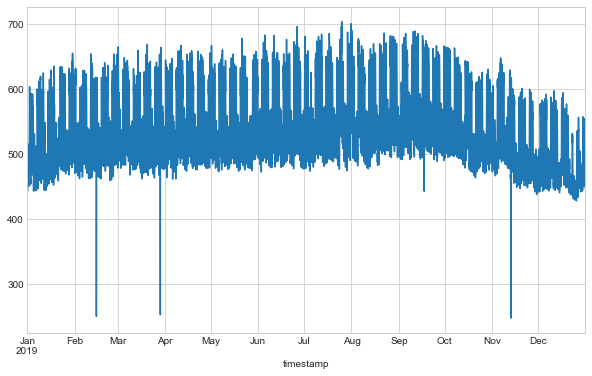

In [3]:
rcParams['figure.figsize'] = 10,6
plt.style.use('seaborn-whitegrid')

final['kW'].plot()

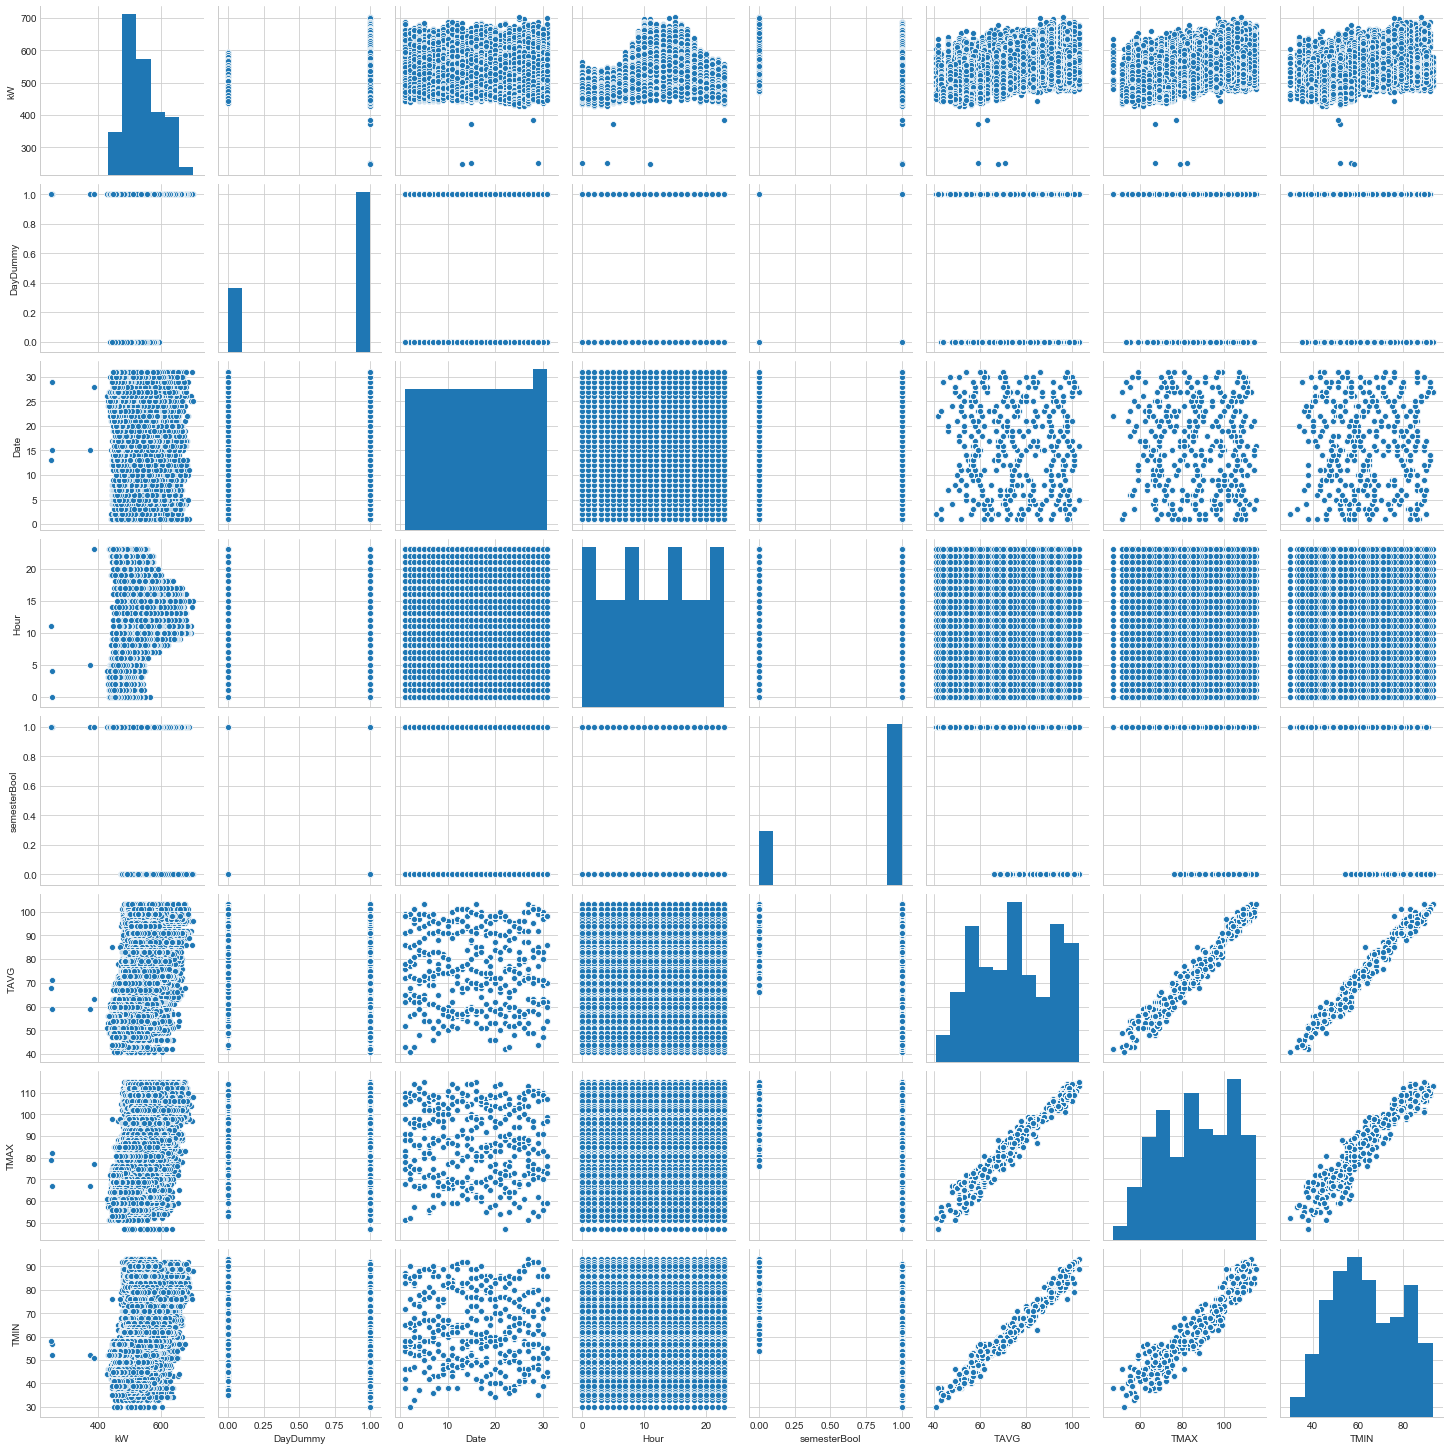

In [4]:
sb.pairplot(final)

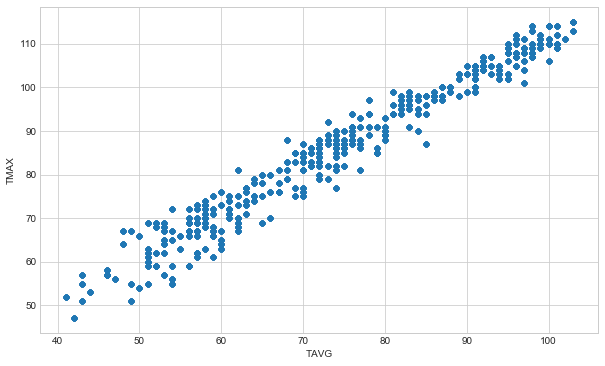

In [5]:
data.plot(kind='scatter',x='TAVG',y='TMAX')
#plt.xlabel('time')
#final['kW'].plot()

In [6]:
print(final.corr())

                    kW      DayDummy          Date          Hour  \
kW            1.000000  3.206665e-01 -2.516607e-02  3.065297e-01   
DayDummy      0.320666  1.000000e+00 -2.803586e-03 -1.784726e-19   
Date         -0.025166 -2.803586e-03  1.000000e+00  4.848940e-18   
Hour          0.306530 -1.784726e-19  4.848940e-18  1.000000e+00   
semesterBool -0.135222 -2.987325e-03 -7.682457e-03 -2.867407e-19   
TAVG          0.327225 -1.741004e-02 -4.172424e-02  9.698672e-18   
TMAX          0.330067 -2.084154e-02 -5.887327e-02 -1.381753e-18   
TMIN          0.314281 -1.600774e-02 -5.613290e-02  3.062123e-18   

              semesterBool          TAVG          TMAX          TMIN  
kW           -1.352217e-01  3.272247e-01  3.300666e-01  3.142808e-01  
DayDummy     -2.987325e-03 -1.741004e-02 -2.084154e-02 -1.600774e-02  
Date         -7.682457e-03 -4.172424e-02 -5.887327e-02 -5.613290e-02  
Hour         -2.867407e-19  9.698672e-18 -1.381753e-18  3.062123e-18  
semesterBool  1.000000e+00 -4.78

In [46]:
attributes = final[['semesterBool','TMAX','Hour','DayDummy']].values
target = final[['kW']].values

attribute_names = ['semesterBool','TMAX']

scaler = MinMaxScaler()
scaledX = scaler.fit_transform(attributes)

X, y = scaledX, target

## Using linear regression to predict Energy demand

In [8]:
missing_values = X==np.NAN
X[missing_values == True]

array([], dtype=float64)

In [47]:
LinReg = LinearRegression(normalize=True)

LinReg.fit(X, y)

print(LinReg.score(X, y))

0.31092668011324787
